# 03. Feature Engineering

**Proyecto:** Fantasy Bidding Intelligence  
**Objetivo:** Crear y transformar features para maximizar la señal predictiva de los modelos de clasificación y regresión.  
Esta fase se basa en la auditoría de datos y EDA realizado previamente.


### Librerías y Dataset
Importamos las librerías necesarias y cargamos el dataset unificado limpio.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de pandas y seaborn
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Cargar dataset
df = pd.read_csv("../data/processed/data_model.csv")
df["recibe_puja"] = df["equipo"].notnull().astype(int)
df.head()


,date,jugador,precio,posicionJugador,puntosJugador,equipoLiga,avgPoints,estado,variacion,jornada,detalles,equipo,ganancias,num_pujas,recibe_puja
0,2025-10-29,A. ZAKHARYAN,0.205,3.0,7.0,16.0,1.8,0,NaN,11,2.0,NaN,NaN,0,0
1,2025-10-29,F. UGRINIC,0.170,3.0,8.0,19.0,2.0,0,NaN,11,2.0,NaN,NaN,0,0
2,2025-10-29,A. OSAMBELA,0.162,3.0,10.0,50.0,2.5,0,NaN,11,2.0,NaN,NaN,0,0
3,2025-10-29,A. SAN MIGUEL,0.198,1.0,0.0,4.0,0.0,0,NaN,11,2.0,NaN,NaN,0,0
4,2025-10-29,A. ITURBE,0.196,1.0,0.0,23.0,0.0,0,NaN,11,2.0,NaN,NaN,0,0


### Tipos de variables
Confirmamos los tipos de variables para planificar las transformaciones.


In [2]:
df.info()
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             304 non-null    object 
 1   jugador          304 non-null    object 
 2   precio           304 non-null    float64
 3   posicionJugador  304 non-null    float64
 4   puntosJugador    304 non-null    float64
 5   equipoLiga       304 non-null    float64
 6   avgPoints        304 non-null    float64
 7   estado           304 non-null    int64  
 8   variacion        269 non-null    float64
 9   jornada          304 non-null    int64  
 10  detalles         304 non-null    float64
 11  equipo           68 non-null     object 
 12  ganancias        68 non-null     float64
 13  num_pujas        304 non-null    int64  
 14  recibe_puja      304 non-null    int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 35.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,304,25,2025-10-29,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jugador,304,209,A. OSAMBELA,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio,304.0,NaN,NaN,NaN,2.980204,3.661019,0.16,0.183,1.0515,5.65575,15.391
posicionJugador,304.0,NaN,NaN,NaN,2.582237,0.893586,1.0,2.0,3.0,3.0,4.0
puntosJugador,304.0,NaN,NaN,NaN,26.141447,18.977224,-6.0,10.75,23.0,37.0,77.0
equipoLiga,304.0,NaN,NaN,NaN,103.6875,283.637449,1.0,9.0,17.0,48.0,1370.0
avgPoints,304.0,NaN,NaN,NaN,3.042763,1.598188,-2.0,2.2,3.1,4.0,14.0
estado,304.0,NaN,NaN,NaN,0.279605,0.818986,0.0,0.0,0.0,0.0,5.0
variacion,269.0,NaN,NaN,NaN,-0.008758,0.064914,-0.211,-0.048,-0.01,0.03,0.171
jornada,304.0,NaN,NaN,NaN,13.230263,2.152504,11.0,12.0,13.0,13.0,18.0


### Transformaciones Numéricas
- Escalado y normalización de variables numéricas.
- Creación de features derivadas para eficiencia o momentum.


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_features = ["precio", "avgPoints", "puntosJugador", "variacion", "detalles"]

# Escalado estándar
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Feature derivada: eficiencia = avgPoints / precio
df["eficiencia"] = df["avgPoints"] / (df["precio"] + 1e-6)  # evitar división por 0

# Feature derivada: momentum = variacion binaria
df["subida"] = (df["variacion"] > 0).astype(int)

df.head()


,date,jugador,precio,posicionJugador,puntosJugador,equipoLiga,avgPoints,estado,variacion,jornada,detalles,equipo,ganancias,num_pujas,recibe_puja,eficiencia,subida
0,2025-10-29,A. ZAKHARYAN,-0.759291,3.0,-1.010317,16.0,-0.778890,0,NaN,11,-1.019826,NaN,NaN,0,0,1.025813,0
1,2025-10-29,F. UGRINIC,-0.768867,3.0,-0.957535,19.0,-0.653542,0,NaN,11,-1.019826,NaN,NaN,0,0,0.850007,0
2,2025-10-29,A. OSAMBELA,-0.771056,3.0,-0.851972,50.0,-0.340172,0,NaN,11,-1.019826,NaN,NaN,0,0,0.441177,0
3,2025-10-29,A. SAN MIGUEL,-0.761206,1.0,-1.379788,4.0,-1.907022,0,NaN,11,-1.019826,NaN,NaN,0,0,2.505266,0
4,2025-10-29,A. ITURBE,-0.761754,1.0,-1.379788,23.0,-1.907022,0,NaN,11,-1.019826,NaN,NaN,0,0,2.503467,0


### Transformaciones Categóricas
Variables categóricas:
- `posicionJugador`  
- `estado`  
- `equipoLiga`  
- `jornada`  

Se aplicarán estrategias de encoding según la señal y frecuencia de categorías:
- One-hot encoding para pocas categorías frecuentes
- Target encoding o agrupación para categorías raras


In [4]:
# Confirmar categorías
categorical_features = ["posicionJugador", "estado", "equipoLiga", "jornada"]
for col in categorical_features:
    print(f"{col} unique values: {df[col].nunique()}")


posicionJugador unique values: 4
estado unique values: 6
equipoLiga unique values: 20
jornada unique values: 4


In [5]:
# One-hot para posición y estado (pocas categorías)
df = pd.get_dummies(df, columns=["posicionJugador", "estado"], drop_first=True)


In [6]:
# Target encoding: equipoLiga y jornada
# Se puede usar mean de recibe_puja
target = "recibe_puja"

# Target encoding suavizado (simple ejemplo)
for col in ["equipoLiga", "jornada"]:
    means = df.groupby(col)[target].mean()
    df[col + "_target_enc"] = df[col].map(means)

# Opcional: eliminar columnas originales si se prefiere usar solo target encoding
# df.drop(columns=["equipoLiga", "jornada"], inplace=True)


In [7]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   304 non-null    object 
 1   jugador                304 non-null    object 
 2   precio                 304 non-null    float64
 3   puntosJugador          304 non-null    float64
 4   equipoLiga             304 non-null    float64
 5   avgPoints              304 non-null    float64
 6   variacion              269 non-null    float64
 7   jornada                304 non-null    int64  
 8   detalles               304 non-null    float64
 9   equipo                 68 non-null     object 
 10  ganancias              68 non-null     float64
 11  num_pujas              304 non-null    int64  
 12  recibe_puja            304 non-null    int64  
 13  eficiencia             304 non-null    float64
 14  subida                 304 non-null    int64  
 15  posici

## 6. Interacciones y Features Derivadas Avanzadas

A partir del análisis exploratorio y de correlaciones, se crean features adicionales que combinan
variables existentes con el objetivo de capturar relaciones no lineales y señales latentes
que no aparecen en las variables individuales.


### 6.1 Ratios y métricas de eficiencia

Se crean ratios que relacionan rendimiento deportivo y coste económico del jugador.
Estas variables suelen capturar mejor la lógica de decisión de los managers.


In [8]:
# Evitar divisiones por cero
epsilon = 1e-6

df["precio_por_punto"] = df["precio"] / (df["puntosJugador"] + epsilon)
df["precio_por_avgPoint"] = df["precio"] / (df["avgPoints"] + epsilon)

df["puntos_por_precio"] = df["puntosJugador"] / (df["precio"] + epsilon)
df["avgPoints_por_precio"] = df["avgPoints"] / (df["precio"] + epsilon)

df[[
    "precio_por_punto",
    "precio_por_avgPoint",
    "puntos_por_precio",
    "avgPoints_por_precio"
]].describe()


,precio_por_punto,precio_por_avgPoint,puntos_por_precio,avgPoints_por_precio
count,304.000000,304.000000,304.000000,304.000000
mean,0.449909,0.904366,0.692576,0.448234
std,9.002352,5.890507,1.436407,1.750639
min,-138.132742,-26.213972,-7.910470,-18.671475
25%,0.548677,0.255943,0.284016,0.034955
50%,0.805823,1.086753,0.819748,0.541683
75%,1.455532,1.859785,1.435194,0.960184
max,42.633390,28.790739,8.574751,4.893456


### 6.2 Señales de momentum de mercado

Se incorporan variables que capturan el comportamiento reciente del mercado,
especialmente la tendencia de subida o bajada del valor del jugador.


In [9]:
# Momentum continuo
df["momentum_variacion"] = df["variacion"]

# Momentum categórico
df["variacion_pos"] = (df["variacion"] > 0).astype(int)
df["variacion_neg"] = (df["variacion"] < 0).astype(int)

df[["momentum_variacion", "variacion_pos", "variacion_neg"]].head()


,momentum_variacion,variacion_pos,variacion_neg
0,NaN,0,0
1,NaN,0,0
2,NaN,0,0
3,NaN,0,0
4,NaN,0,0


### 6.3 Interacciones entre variables categóricas y numéricas

Se crean interacciones entre posición del jugador y variables de rendimiento
para capturar diferencias estructurales entre posiciones.


In [10]:
# Ejemplo: puntos ajustados por posición (one-hot ya aplicado previamente)
pos_cols = [col for col in df.columns if col.startswith("posicionJugador_")]

for col in pos_cols:
    df[f"avgPoints_{col}"] = df["avgPoints"] * df[col]

df[[c for c in df.columns if "avgPoints_posicionJugador" in c]].head()


,avgPoints_posicionJugador_2.0,avgPoints_posicionJugador_3.0,avgPoints_posicionJugador_4.0
0,-0.0,-0.778890,-0.0
1,-0.0,-0.653542,-0.0
2,-0.0,-0.340172,-0.0
3,-0.0,-0.000000,-0.0
4,-0.0,-0.000000,-0.0


## 7. Tratamiento de Outliers y Valores Extremos

Los valores extremos pueden distorsionar el entrenamiento de ciertos modelos,
especialmente modelos lineales y basados en distancia.
Se aplican técnicas de clipping (winsorización) para limitar su impacto.


### 7.1 Inspección de outliers en variables clave


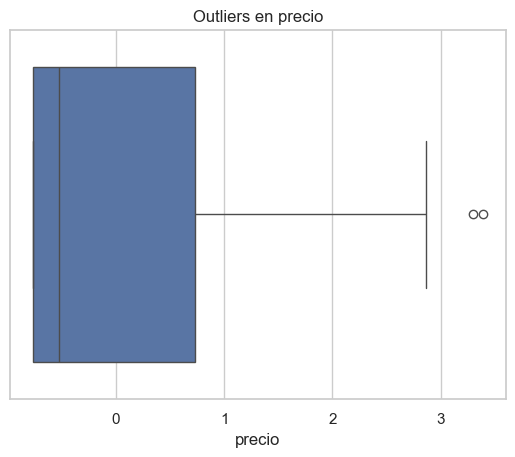

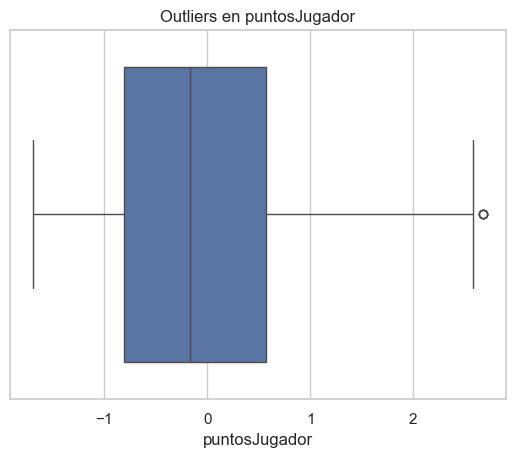

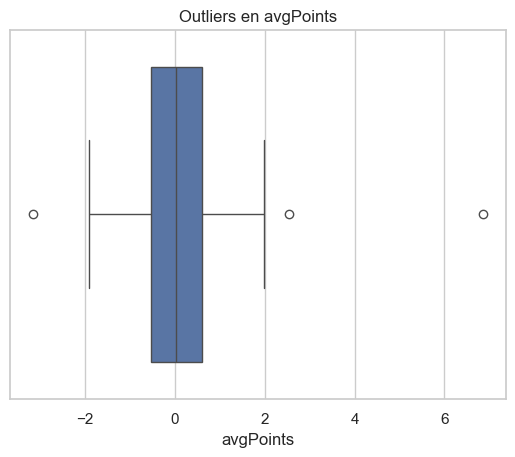

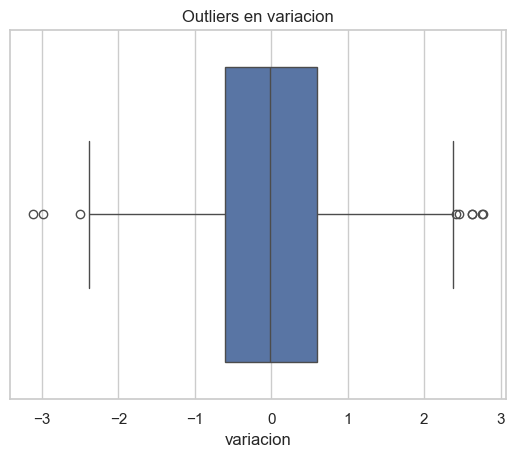

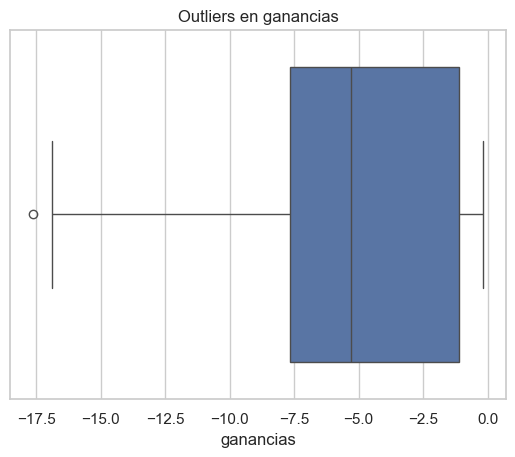

In [11]:
outlier_features = [
    "precio",
    "puntosJugador",
    "avgPoints",
    "variacion",
    "ganancias"
]

for col in outlier_features:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers en {col}")
    plt.show()


### 7.2 Winsorización de variables numéricas

Se aplica clipping por percentiles para reducir el efecto de valores extremos
sin eliminar observaciones.


In [12]:
def clip_percentiles(series, lower=0.01, upper=0.99):
    return series.clip(
        lower=series.quantile(lower),
        upper=series.quantile(upper)
    )

for col in outlier_features:
    df[col] = clip_percentiles(df[col])


### 7.3 Binning de variables continuas

El binning permite capturar efectos no lineales de forma sencilla,
especialmente útil para modelos lineales.


In [13]:
df["precio_bin"] = pd.qcut(df["precio"], q=4, labels=False)
df["avgPoints_bin"] = pd.qcut(df["avgPoints"], q=4, labels=False)

df[["precio_bin", "avgPoints_bin"]].head()


,precio_bin,avgPoints_bin
0,1,0
1,0,0
2,0,1
3,1,0
4,1,0


## 8. Resumen Final de Features para Modelado

A continuación se resume el conjunto final de variables listas para el modelado,
incluyendo transformaciones y señal esperada.


| Feature                         | Tipo        | Transformación aplicada                     | Señal esperada |
|---------------------------------|-------------|---------------------------------------------|----------------|
| precio                          | Numérica    | Escalado + clipping                         | Alta           |
| avgPoints                       | Numérica    | Escalado + clipping                         | Alta           |
| puntosJugador                   | Numérica    | Escalado + clipping                         | Alta           |
| variacion                       | Numérica    | Escalado + momentum                         | Muy alta       |
| detalles                        | Numérica    | Escalado                                   | Moderada       |
| ganancias                       | Numérica    | Escalado + clipping                         | Alta           |
| eficiencia / ratios             | Numérica    | Feature derivada                            | Alta           |
| posicionJugador_*               | Categórica  | One-hot                                    | Alta           |
| estado_*                        | Categórica  | One-hot                                    | Muy alta       |
| equipoLiga_target_enc           | Categórica  | Target encoding                            | Moderada       |
| jornada_target_enc              | Categórica  | Target encoding                            | Moderada       |
| bins continuos                  | Categórica  | Binning                                    | Complementaria |


## 9. Exportación del Dataset Final

Se exporta el dataset procesado para su uso directo en la fase de modelado.


In [ ]:
df.to_csv("../results/03_dataset_features_modelado.csv", index=False)


: 